In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
data = pd.read_csv('ilvsc_data.csv')

In [23]:
data

,year,name,top5,top1,params(M),layers
0,2010.0,LCC-SVM,28.200,47.100,0.0,0.0
1,2011.0,SIFT+FVs,25.700,45.700,0.0,0.0
2,2012.0,AlexNet,15.400,36.700,60.0,8.0
3,2013.0,ZFNet,14.700,36.000,60.0,8.0
4,2014.0,GoogLeNet,8.830,27.130,5.0,22.0
5,2015.0,ResNet-101,5.414,20.456,45.0,101.0
6,2016.0,ResNeXt-101,5.006,19.398,84.0,101.0
7,2017.0,SENet-154,4.644,18.776,115.0,154.0
8,2018.0,FixResNeXt-101,2.000,13.600,829.0,101.0
9,2019.0,BiT-L,1.800,12.200,1000.0,NaN


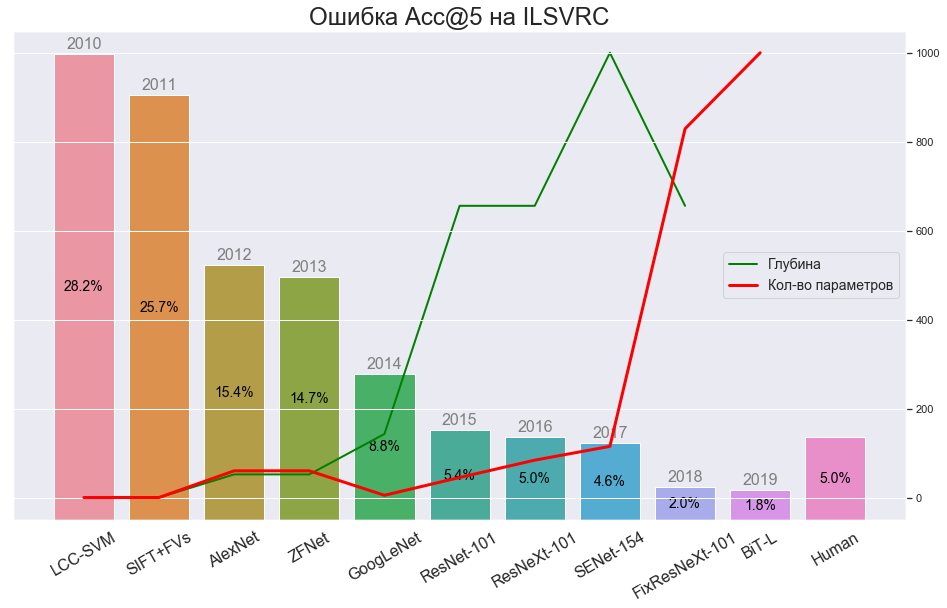

In [55]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x=data.index, y=data['top5'], ax=ax)
ax.set_title('Ошибка Acc@5 на ILSVRC', fontsize=24)
ax.set_xticklabels(data['name'], rotation=30, fontsize=16)

for i, p in enumerate(ax.patches[:-1]):
    ax.annotate(
        f'{2010+i}', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=16, color='gray', xytext=(0, 10),
        textcoords='offset points'
    )
    ax.annotate(
        f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2.),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 0),
        textcoords='offset points'
    )
p = ax.patches[-1]
ax.annotate(
        f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2.),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 0),
        textcoords='offset points'
    )
ax2 = ax.twinx()
ln2 = ax2.plot(data.index, data['layers'], color='green', linewidth=2, label='Глубина')
ax3 = ax.twinx()
ln3 = ax3.plot(data.index, data['params(M)'], color='red', linewidth=3, label='Кол-во параметров')

# added these three lines
lns = ln2 + ln3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5, fontsize=14)
ax.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
# ax3.get_yaxis().set_visible(False)
plt.show()